<a href="https://colab.research.google.com/github/elahekarimi/Deep-learning-classifier/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 4


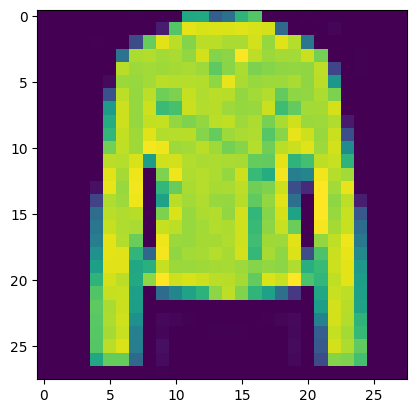

In [23]:
imgIndex = 9
image = x_train[imgIndex]
print("Image Label :",y_train[imgIndex])
plt.imshow(image)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),  # Added layer with more neurons
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
x_valid, x_train = x_train[:5000]/255.0, x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adjust the learning rate as needed
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=14, validation_data=(x_valid, y_valid))

Epoch 1/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1138 - accuracy: 0.9575 - val_loss: 0.5956 - val_accuracy: 0.8996
Epoch 2/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1053 - accuracy: 0.9602 - val_loss: 0.5966 - val_accuracy: 0.8946
Epoch 3/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1077 - accuracy: 0.9593 - val_loss: 0.6050 - val_accuracy: 0.8984
Epoch 4/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1034 - accuracy: 0.9605 - val_loss: 0.5821 - val_accuracy: 0.9000
Epoch 5/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1002 - accuracy: 0.9619 - val_loss: 0.6494 - val_accuracy: 0.8962
Epoch 6/14
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1004 - accuracy: 0.9613 - val_loss: 0.5833 - val_accuracy: 0.8970
Epoch 7/14
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0936 - accuracy: 0.9629 - val_loss: 0.6292 - val_ac

In [16]:
new = x_test[:10]
prediction = model.predict(new)
print(prediction)

1/1 [==============================] - 0s 30ms/step
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.99999994]
 [0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99999994 0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.      

In [17]:
classes = np.argmax(prediction, axis=1)
print(classes)

[9 2 1 1 6 1 4 4 5 7]


In [18]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
predicted_labels = np.array([class_labels[i] for i in classes])

# Print the result
print(predicted_labels)

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Coat' 'Sandal' 'Sneaker']
